In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np



In [4]:
labels = ['rugby', 'soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        print(path)
        for img in os.listdir(path):
            try:
          
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                print(img_arr)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/MyDrive/input/train')

val = get_data('/content/drive/MyDrive/input/test')
 

Streaming output truncated to the last 5000 lines.
  [223 215 194]]]
[[[121 129  80]
  [122 130  81]
  [123 131  80]
  ...
  [121 128  84]
  [121 128  87]
  [123 129  93]]

 [[120 128  79]
  [121 129  80]
  [121 129  78]
  ...
  [119 127  80]
  [119 126  84]
  [122 128  90]]

 [[120 128  79]
  [120 128  79]
  [121 129  80]
  ...
  [116 126  74]
  [118 125  81]
  [120 127  86]]

 ...

 [[ 83 100  84]
  [ 84 101  85]
  [ 87 101  86]
  ...
  [ 69  86  68]
  [ 69  86  68]
  [ 69  86  68]]

 [[ 84 101  85]
  [ 84 101  83]
  [ 87 101  84]
  ...
  [ 68  85  67]
  [ 68  85  67]
  [ 69  86  68]]

 [[ 83 100  82]
  [ 84 101  83]
  [ 88 102  85]
  ...
  [ 67  84  66]
  [ 67  84  66]
  [ 67  84  66]]]
[[[ 28  44   8]
  [ 21  37   1]
  [ 24  41   5]
  ...
  [ 25  43   5]
  [ 21  39   1]
  [ 42  60  22]]

 [[ 22  38   2]
  [ 26  42   6]
  [ 27  44   8]
  ...
  [ 26  44   6]
  [ 35  53  15]
  [ 45  63  23]]

 [[ 16  32   0]
  [ 30  46   9]
  [ 31  49  11]
  ...
  [ 31  47   8]
  [ 38  54  15]
  [ 36 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Streaming output truncated to the last 5000 lines.
  [190 202 188]
  [213 226 209]]]
[[[ 97  93  68]
  [ 99  95  70]
  [103  99  72]
  ...
  [120 117  74]
  [120 117  74]
  [121 118  75]]

 [[ 99  95  70]
  [100  96  71]
  [102  98  71]
  ...
  [117 114  71]
  [119 116  73]
  [120 117  74]]

 [[104 100  75]
  [103  99  74]
  [102  98  71]
  ...
  [112 111  67]
  [114 111  68]
  [115 112  69]]

 ...

 [[ 98 113  58]
  [ 97 112  57]
  [ 96 111  56]
  ...
  [109 127  69]
  [111 129  71]
  [113 131  73]]

 [[ 99 113  60]
  [ 97 111  58]
  [ 96 110  57]
  ...
  [109 127  69]
  [110 128  70]
  [112 130  72]]

 [[ 99 113  60]
  [ 96 110  57]
  [ 96 110  57]
  ...
  [109 127  69]
  [110 128  70]
  [111 129  71]]]
[[[20 30 19]
  [18 29 12]
  [28 37 16]
  ...
  [ 8 10  9]
  [ 5  9  8]
  [ 7 11 10]]

 [[22 32 21]
  [24 35 18]
  [26 38 16]
  ...
  [ 8 10  9]
  [ 4  6  5]
  [ 4  8  7]]

 [[19 30 16]
  [25 36 19]
  [25 37 15]
  ...
  [ 9 11 10]
  [10 12 11]
  [ 9 11 10]]

 ...

 [[21 22 17]
  [20 20

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [8]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [19]:
from keras.optimizer_v2.adam import Adam
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [20]:
history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


77/77 [==============================] - 154s 2s/step - loss: 0.7003 - accuracy: 0.5000 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 2/50
77/77 [==============================] - 156s 2s/step - loss: 0.7003 - accuracy: 0.5000 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 3/50
77/77 [==============================] - 156s 2s/step - loss: 0.7003 - accuracy: 0.5000 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 4/50
77/77 [==============================] - 156s 2s/step - loss: 0.7003 - accuracy: 0.5000 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 5/50
77/77 [==============================] - 158s 2s/step - loss: 0.7000 - accuracy: 0.5004 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 6/50
77/77 [==============================] - 156s 2s/step - loss: 0.7000 - accuracy: 0.5004 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 7/50
77/77 [==============================] - 155s 2s/step - loss: 0.7000 - accuracy: 0.5004 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 8/50
77/77 [======

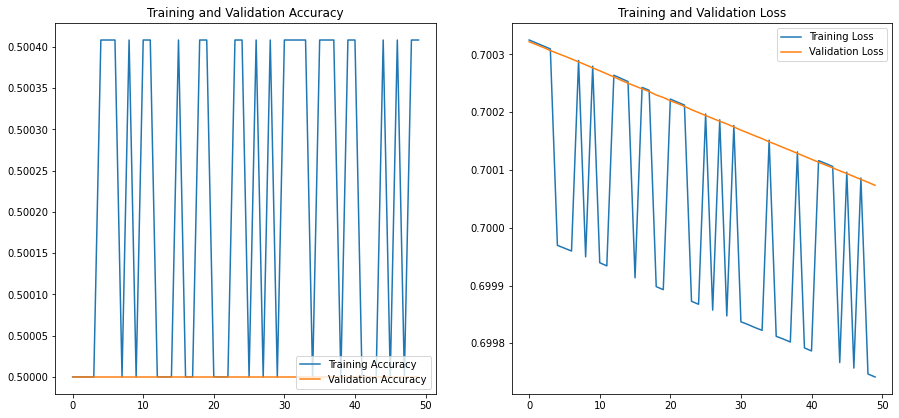

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
predictions = np.argmax(model.predict(x_val), axis=-1),
predictions = np.asarray(predictions)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))


                  precision    recall  f1-score   support

 Rugby (Class 0)       0.50      1.00      0.67       305
Soccer (Class 1)       0.00      0.00      0.00       305

        accuracy                           0.50       610
       macro avg       0.25      0.50      0.33       610
    weighted avg       0.25      0.50      0.33       610



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Task 1: Run the above code with given dataset.

Task 2: Run the code with different dataset




